# Getting started with Sklearn

In [1]:
%config InlineBackend.figure_format = "svg"
%matplotlib inline

## 1 - Building a regression estimator

In this exercise, you will start by importing the scikit-learn library and working with the Diabetes dataset. The goal is to load the data, split it into training and testing sets, and train a regression model to make predictions.

1. Import the necessary scikit-learn modules and load the Diabetes dataset.
3. Split the dataset into training and testing sets. Set aside 20% of the data for testing.
4. Choose a regression model from scikit-learn (e.g., Linear Regression).
5. Train the chosen regression model on the training data.
6. Use the trained regression model to make predictions on the test data.
7. Evaluate the performance of your regression model using appropriate regression metrics.

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the Diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions using the trained model
y_pred = regressor.predict(X_test)

# Evaluate the performance of the regression model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 2900.1936284934814
R-squared: 0.4526027629719195


## 2 - Visualizing overfitting

The goal here is to investigate the challenges associated with both underfitting and overfitting in machine learning, as well as demonstrate how we can leverage linear regression in conjunction with polynomial features to approximate non-linear functions.

1. Load the files `./train.csv` and `./test.csv` into Python using your method of choice. The column `x` is the feature and the column `y` is the target.
2. Fit the training data with three polynomial regression models of order 1, 4 and 13.
3. For the test set, make a plot of `x` as a function of both the true `y` and the predicted `y`.
4. Also calculate the test set performance using a performance metric (e.g., mean-squared error).
5. Discuss how each model performs in terms of generalization error.

In [2]:
import numpy as np
import pandas as pd

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)
num_samples = 30

X_train = np.sort(np.random.rand(num_samples))
y_train = true_fun(X_train) + np.random.randn(num_samples) * 0.1

X_test = np.linspace(0, 1, 100)
y_test = true_fun(X_test)

pd.DataFrame({
    "x": X_train.flatten(),
    "y": y_train.flatten()
}).to_csv("./train.csv", index=False)

pd.DataFrame({
    "x": X_test.flatten(),
    "y": y_test.flatten()
}).to_csv("./test.csv", index=False)

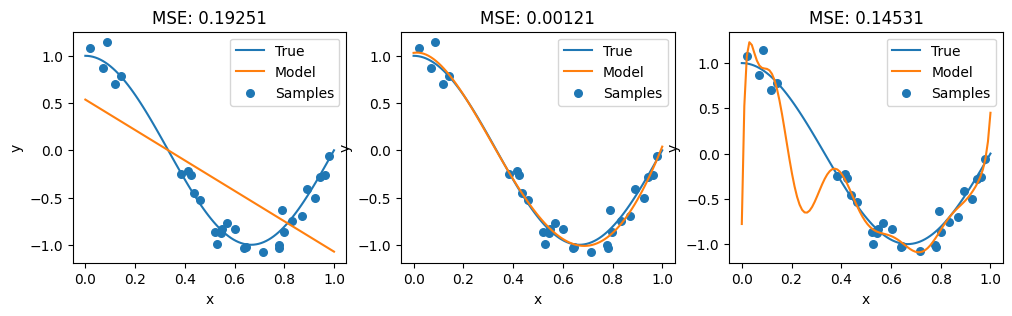

In [3]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

df_train = pd.read_csv("./docs/train.csv")
X_train, y_train = df_train["x"].to_numpy(), df_train["y"].to_numpy()

df_test = pd.read_csv("./docs/test.csv")
X_test, y_test = df_test["x"].to_numpy(), df_test["y"].to_numpy()

degrees = [1, 4, 13]

fig, axs = plt.subplots(1, 3, sharey=False, figsize=(12, 3))

for ax, degree in zip(axs.flatten(), degrees):
    
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X_train[:, np.newaxis], y_train)
    y_pred = pipeline.predict(X_test[:, np.newaxis])
    mse = mean_squared_error(y_test, y_pred)
    
    ax.plot(X_test, y_test, label="True")
    ax.plot(X_test, y_pred, label="Model")
    ax.scatter(X_train, y_train, lw=1, s=30, label="Samples")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title(f"MSE: {mse:0.5f}")
    ax.legend()

## 4 - Time for a competition

https://www.kaggle.com/t/ee5d7bdb13194070ad13df1d80db47cc

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

In [ ]:
df_train = pd.read_csv("./kaggle/train.csv")
df_test = pd.read_csv("./kaggle/test.csv")
df_solution = pd.read_csv("./kaggle/solution.csv")